## Grabbing the precip files from GPCP NOAA servers

In [2]:
import xarray as xr
from PrecipData import getPrecip

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid", {"axes.facecolor": ".9"})
plt.rcParams.update({'font.size': 22})
plt.rcParams.update({'font.family' : 'sans-serif'})
plt.rcParams.update({'font.sans-serif' : 'DejaVu Sans'})

In [2]:
# # This takes a very long time!
# precip = getPrecip(1997,2019)
# precip.to_netcdf("GPCP_1997-2019_global.nc")

'Gathering data for 2000'

In [3]:
# Read in pre-downloaded data
precip = xr.open_dataset("GPCP_1997-2019_global.nc")

In [13]:
# We have every daily JJA precip measurement from 1997 to 2019
precip

<xarray.Dataset>
Dimensions:      (latitude: 180, longitude: 360, nv: 2, time: 2117)
Coordinates:
  * latitude     (latitude) float32 -90.0 -89.0 -88.0 -87.0 ... 87.0 88.0 89.0
  * longitude    (longitude) float32 0.0 1.0 2.0 3.0 ... 356.0 357.0 358.0 359.0
  * time         (time) datetime64[ns] 1997-06-01 1997-06-02 ... 2019-08-31
Dimensions without coordinates: nv
Data variables:
    lat_bounds   (time, latitude, nv) float32 ...
    lon_bounds   (time, longitude, nv) float32 ...
    time_bounds  (time, nv) object ...
    precip       (time, latitude, longitude) float32 0.17455836 ... 2.0801144
Attributes:
    Conventions:                CF-1.6, ACDD 1.3
    title:                      Global Precipitation Climatatology Project (G...
    source:                     /data1/GPCP_CDR/GPCP_Output/1DD//bin/199706/s...
    references:                 Huffman et al. 1997, http://dx.doi.org/10.117...
    history:                    1) 2017-05-30T16:53:23Z, Dr. Jian-Jian Wang, ...
    Metadata_Conventions:       CF-1.6, Unidata Dataset Discovery v1.0, NOAA ...
    standard_name_vocabulary:   CF Standard Name Table (v41, 22 February 2017)
    id:                         199706/gpcp_v01r03_daily_d19970601_c20170530.nc
    naming_authority:           gov.noaa.ncdc
    date_created:               2017-05-30T16:53:23Z
    license:                    No constraints on data access or use.
    summary:                    Global Precipitation Climatology Project (GPC...
    keywords:                   EARTH SCIENCE > ATMOSPHERE > PRECIPITATION > ...
    keywords_vocabulary:        NASA Global Change Master Directory (GCMD) Ea...
    cdm_data_type:              Grid
    project:                    GPCP > Global Precipitation Climatology Project
    processing_level:           NASA Level 3
    creator_name:               Dr. Jian-Jian Wang
    creator_email:              jjwang@umd.edu
    institution:                ACADEMIC > UMD/ESSIC > Earth System Science I...
    publisher_name:             NOAA National Centers for Environmental Infor...
    publisher_email:            jjwang@umd.edu
    publisher_url:              https://www.ncei.noaa.gov
    geospatial_lat_min:         -90.0
    geospatial_lat_max:         90.0
    geospatial_lat_units:       degrees_north
    geospatial_lat_resolution:  1 degree
    geospatial_lon_min:         0.0
    geospatial_lon_max:         360.0
    geospatial_lon_units:       degrees_east
    geospatial_lon_resolution:  1 degree
    time_coverage_start:        1997-06-01T00:00:00Z
    time_coverage_end:          1997-06-01T23:59:59Z
    time_coverage_duration:     P1D
    contributor_name:           Robert Adler, Jian-Jian Wang
    contributor_role:           principalInvestigator, processor and custodian
    acknowledgment:             This project was supported in part by a grant...
    cdr_program:                NOAA Climate Data Record Program for satellit...
    cdr_variable:               precipitation
    metadata_link:              gov.noaa.ncdc:XXXXX
    product_version:            v01r03
    platform:                   GOES (Geostationary Operational Environmental...
    sensor:                     Imager, TOVS > TIROS Operational Vertical Sou...
    spatial_resolution:         1 degree
    comment:                    Processing computer: eagle2.umd.edu

## Mumbai

In [14]:
# Mumbai, India (lon,lat) = (72.825833, 18.975), taken from Wikipedia/GeoHack
mumbai = precip.sel(longitude=72.825833,latitude=18.975, method='nearest')

In [15]:
# There seems to be one spurious very large data point... let's filter it out
print(mumbai['precip'].max())
mumbai = mumbai.where(mumbai['precip'] < mumbai['precip'].max())

<xarray.DataArray 'precip' ()>
array(9.96920997e+36)
Coordinates:
    latitude   float32 19.0
    longitude  float32 73.0


### Plot CDF of Mumbai precip

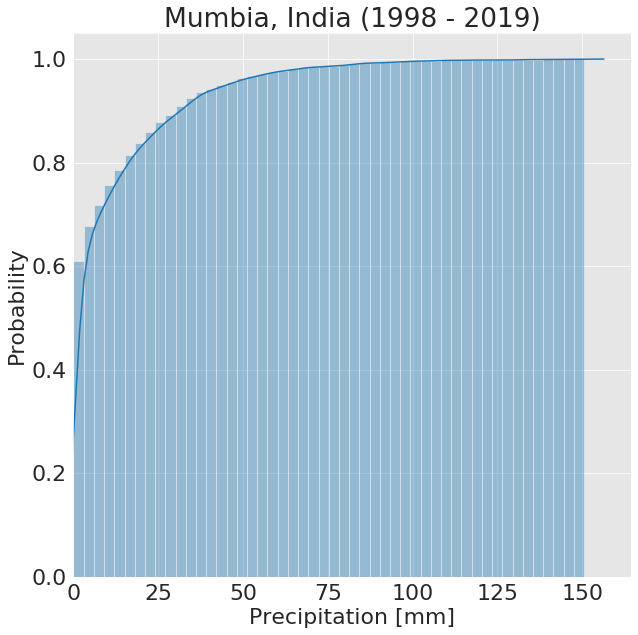

In [16]:
fig, ax = plt.subplots(1,1, figsize = (10,10))
kwargs = {'cumulative': True}
sns.distplot(mumbai['precip'], hist_kws=kwargs, kde_kws=kwargs, ax = ax)
ax.set_xlim(left = 0)
ax.set_xlabel('Precipitation [mm]')
ax.set_ylabel('Probability')
ax.set_title('Mumbia, India (1998 - 2019)')
plt.show()

### What is the 95th percentile value?

In [17]:
np.percentile(mumbai.dropna(dim = 'time')["precip"], 95)

44.9888858795166

### What dates have extreme precip (above 95th percentile)?

In [18]:
mumbai.where(mumbai.precip > np.percentile(mumbai.dropna(dim = 'time')["precip"], 95)).dropna(dim = 'time').time

<xarray.DataArray 'time' (time: 106)>
array(['1997-06-13T00:00:00.000000000', '1997-07-06T00:00:00.000000000',
       '1997-07-25T00:00:00.000000000', '1997-07-26T00:00:00.000000000',
       '1997-08-01T00:00:00.000000000', '1997-08-22T00:00:00.000000000',
       '1997-08-23T00:00:00.000000000', '1997-08-24T00:00:00.000000000',
       '1997-08-25T00:00:00.000000000', '1998-06-15T00:00:00.000000000',
       '1998-07-07T00:00:00.000000000', '1998-07-28T00:00:00.000000000',
       '1998-07-29T00:00:00.000000000', '1998-08-24T00:00:00.000000000',
       '1999-06-11T00:00:00.000000000', '1999-06-22T00:00:00.000000000',
       '1999-07-07T00:00:00.000000000', '1999-07-15T00:00:00.000000000',
       '1999-07-19T00:00:00.000000000', '1999-08-09T00:00:00.000000000',
       '2000-07-13T00:00:00.000000000', '2000-08-24T00:00:00.000000000',
       '2002-06-25T00:00:00.000000000', '2002-06-26T00:00:00.000000000',
       '2002-08-03T00:00:00.000000000', '2002-08-24T00:00:00.000000000',
       '2003-07-27T00:00:00.000000000', '2003-07-28T00:00:00.000000000',
       '2003-08-23T00:00:00.000000000', '2003-08-24T00:00:00.000000000',
       '2004-06-15T00:00:00.000000000', '2004-07-16T00:00:00.000000000',
       '2004-07-30T00:00:00.000000000', '2004-08-02T00:00:00.000000000',
       '2004-08-05T00:00:00.000000000', '2004-08-11T00:00:00.000000000',
       '2005-06-28T00:00:00.000000000', '2005-06-29T00:00:00.000000000',
       '2005-07-19T00:00:00.000000000', '2005-08-01T00:00:00.000000000',
       '2006-06-22T00:00:00.000000000', '2006-06-23T00:00:00.000000000',
       '2006-07-03T00:00:00.000000000', '2006-07-04T00:00:00.000000000',
       '2006-07-05T00:00:00.000000000', '2006-07-29T00:00:00.000000000',
       '2006-07-31T00:00:00.000000000', '2006-08-05T00:00:00.000000000',
       '2006-08-06T00:00:00.000000000', '2006-08-07T00:00:00.000000000',
       '2006-08-08T00:00:00.000000000', '2006-08-09T00:00:00.000000000',
       '2007-06-22T00:00:00.000000000', '2007-07-01T00:00:00.000000000',
       '2007-07-02T00:00:00.000000000', '2007-07-08T00:00:00.000000000',
       '2007-07-26T00:00:00.000000000', '2007-08-08T00:00:00.000000000',
       '2007-08-26T00:00:00.000000000', '2007-08-27T00:00:00.000000000',
       '2007-08-28T00:00:00.000000000', '2008-08-05T00:00:00.000000000',
       '2009-07-21T00:00:00.000000000', '2009-07-22T00:00:00.000000000',
       '2009-08-19T00:00:00.000000000', '2010-07-02T00:00:00.000000000',
       '2010-07-24T00:00:00.000000000', '2011-07-06T00:00:00.000000000',
       '2011-08-28T00:00:00.000000000', '2012-08-30T00:00:00.000000000',
       '2013-06-16T00:00:00.000000000', '2013-07-19T00:00:00.000000000',
       '2013-08-01T00:00:00.000000000', '2013-08-23T00:00:00.000000000',
       '2014-07-22T00:00:00.000000000', '2014-07-23T00:00:00.000000000',
       '2014-07-29T00:00:00.000000000', '2014-07-30T00:00:00.000000000',
       '2014-08-21T00:00:00.000000000', '2014-08-23T00:00:00.000000000',
       '2014-08-25T00:00:00.000000000', '2015-07-25T00:00:00.000000000',
       '2015-07-27T00:00:00.000000000', '2015-08-04T00:00:00.000000000',
       '2015-08-05T00:00:00.000000000', '2016-07-03T00:00:00.000000000',
       '2016-07-09T00:00:00.000000000', '2016-07-10T00:00:00.000000000',
       '2016-07-11T00:00:00.000000000', '2016-08-01T00:00:00.000000000',
       '2016-08-02T00:00:00.000000000', '2016-08-06T00:00:00.000000000',
       '2017-06-03T00:00:00.000000000', '2017-07-20T00:00:00.000000000',
       '2017-07-28T00:00:00.000000000', '2017-08-20T00:00:00.000000000',
       '2018-07-09T00:00:00.000000000', '2018-08-16T00:00:00.000000000',
       '2018-08-21T00:00:00.000000000', '2019-07-20T00:00:00.000000000',
       '2019-07-28T00:00:00.000000000', '2019-07-29T00:00:00.000000000',
       '2019-07-31T00:00:00.000000000', '2019-08-08T00:00:00.000000000',
       '2019-08-09T00:00:00.000000000', '2019-08-30T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
    latitude   float32 19.0
    longitude  float3